# Gradient variations

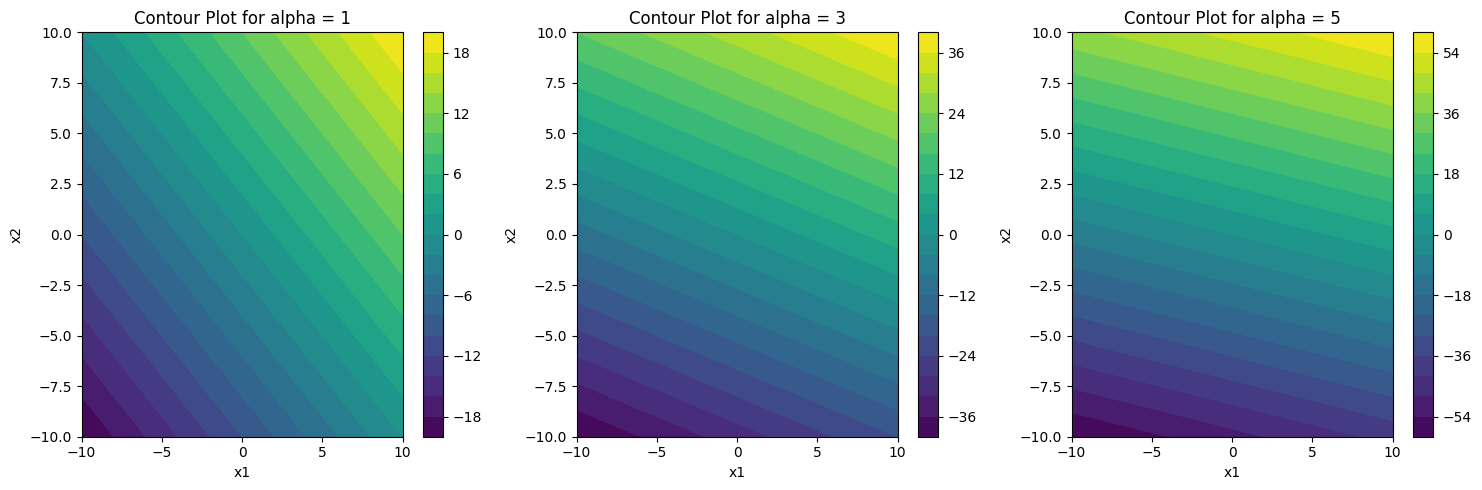

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradients
def f(x1, x2, alpha):
    return x1 + alpha * x2

def gradient(x1, x2, alpha):
    return np.array([1, alpha])

# Create a meshgrid to visualize the gradient field
x1 = np.linspace(-10, 10, 20)
x2 = np.linspace(-10, 10, 20)
X1, X2 = np.meshgrid(x1, x2)

# Values of alpha to consider
alphas = [1, 3, 5]

fig, axs = plt.subplots(1, len(alphas), figsize=(15,5))

for i, alpha in enumerate(alphas):
    # Evaluate the function over the grid
    Z = f(X1, X2, alpha)

    # Plot the contours
    contour = axs[i].contourf(X1, X2, Z, 20, cmap='viridis')  # '20' specifies the number of contour levels
    fig.colorbar(contour, ax=axs[i])  # Add colorbar for reference
    axs[i].set_title(f"Contour Plot for alpha = {alpha}")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")

plt.tight_layout()
plt.show()


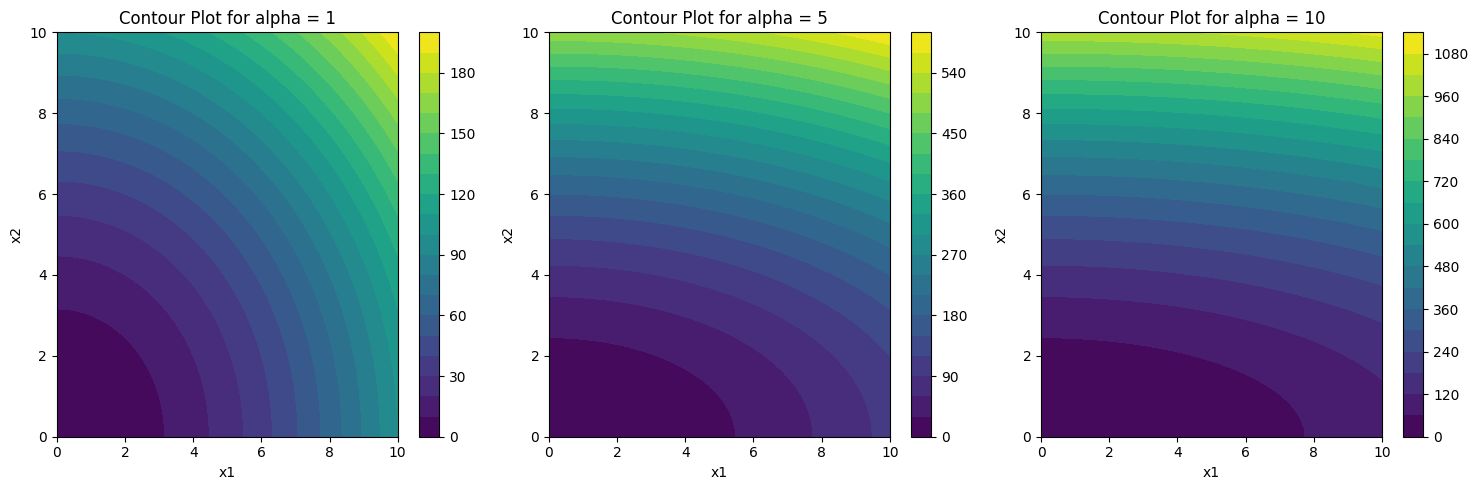

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradients
def f(x1, x2, alpha):
    return x1**2 + alpha * x2**2

def gradient(x1, x2, alpha):
    return np.array([2*x1, alpha*2*x2])

# Create a meshgrid to visualize the gradient field
x1 = np.linspace(0, 10, 50)
x2 = np.linspace(0, 10, 50)
X1, X2 = np.meshgrid(x1, x2)

# Values of alpha to consider
alphas = [1, 5, 10]

fig, axs = plt.subplots(1, len(alphas), figsize=(15,5))

for i, alpha in enumerate(alphas):
    # Evaluate the function over the grid
    Z = f(X1, X2, alpha)

    # Plot the contours
    contour = axs[i].contourf(X1, X2, Z, 20, cmap='viridis')  # '20' specifies the number of contour levels
    fig.colorbar(contour, ax=axs[i])  # Add colorbar for reference
    axs[i].set_title(f"Contour Plot for alpha = {alpha}")
    axs[i].set_xlabel("x1")
    axs[i].set_ylabel("x2")

plt.tight_layout()
plt.show()


## Gradient descent

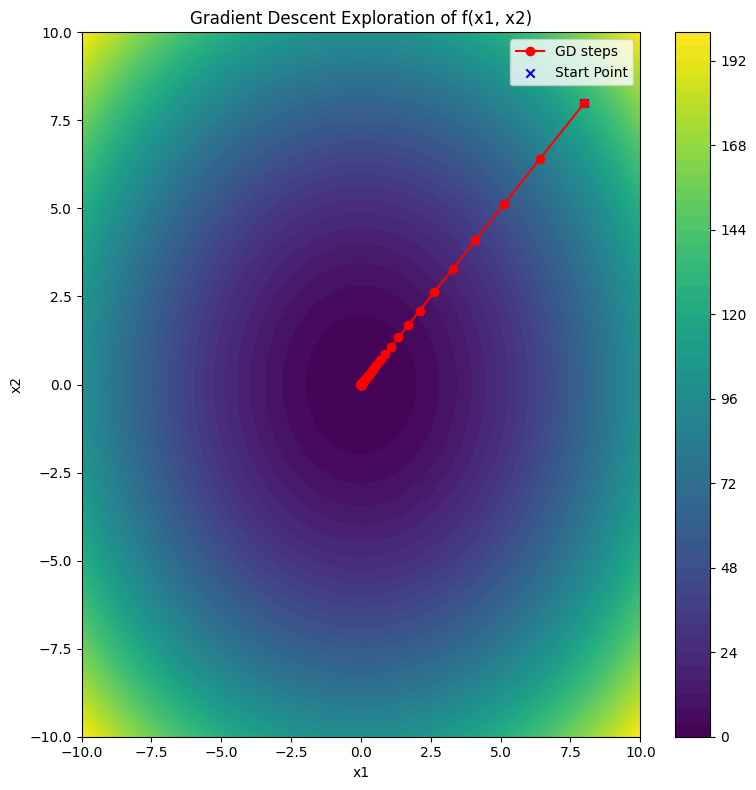

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, alpha):
    return x[0]**2 + alpha * x[1]**2

def gradient(x, alpha):
    return np.array([2*x[0], alpha*2*x[1]])

# Gradient Descent implementation
def gradient_descent(initial, learning_rate, iterations, alpha):
    x = np.copy(initial)
    history = [x]
    for _ in range(iterations):
        x = x - learning_rate * gradient(x, alpha)
        history.append(np.copy(x))
    return history

# Parameters for Gradient Descent
alpha_value = 1  # You can adjust this
learning_rate = 0.1  # Step size
iterations = 50
x0 = [8, 8]  # Initial guess
history = gradient_descent(x0, learning_rate, iterations, alpha_value)

# Create a meshgrid to visualize the contour field
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2], alpha_value)

# Plot the contours of the function
plt.figure(figsize=(8, 8))
contour = plt.contourf(X1, X2, Z, 50, cmap='viridis')
plt.colorbar(contour)

# Overlay the steps taken by Gradient Descent
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], '-o', color='red', label='GD steps')
plt.scatter(*x0, color='blue', marker='x', label='Start Point')
plt.title("Gradient Descent Exploration of f(x1, x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.tight_layout()
plt.show()

## Quasi-Newton method

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4


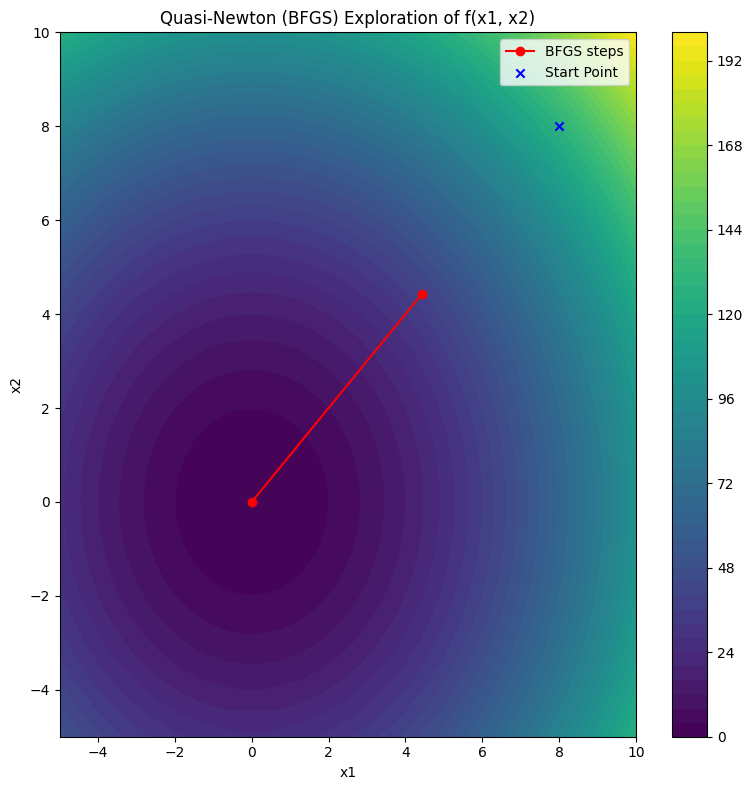

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

# Define the function and its gradient
def f(x, alpha):
    return x[0]**2 + alpha * x[1]**2

def gradient(x, alpha):
    return np.array([2*x[0], alpha*2*x[1]])

# Callback function to keep track of steps taken by BFGS
history = []
def callback(x):
    history.append(np.copy(x))

# Use BFGS to find the minimum
alpha_value = 1 # You can adjust this value
x0 = [8, 8]  # Initial guess
fmin_bfgs(f, x0, fprime=gradient, args=(alpha_value,), callback=callback)

# Create a meshgrid to visualize the contour field
x1 = np.linspace(-5, 10, 100)
x2 = np.linspace(-5, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2], alpha_value)

# Plot the contours of the function
plt.figure(figsize=(8, 8))
contour = plt.contourf(X1, X2, Z, 50, cmap='viridis')
plt.colorbar(contour)

# Overlay the steps taken by BFGS
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], '-o', color='red', label='BFGS steps')
plt.scatter(*x0, color='blue', marker='x', label='Start Point')
plt.title("Quasi-Newton (BFGS) Exploration of f(x1, x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.tight_layout()
plt.show()